## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 40us/step - loss: 2.2677 - acc: 0.1645 - val_loss: 2.2193 - val_acc: 0.2057
Epoch 2/500
50000/50000 [==============================] - 1s 25us/step - loss: 2.1889 - acc: 0.2254 - val_loss: 2.1625 - val_acc: 0.2409
Epoch 3/500
50000/50000 [==============================] - 1s 22us/step - loss: 2.1386 - acc: 0.2536 - val_loss: 2.1175 - val_acc: 0.2587
Epoch 4/500
50000/50000 [==============================] - 1s 24us/step - loss: 2.0975 - acc: 0.2698 - val_loss: 2.0791 - val_acc: 0.2702
Epoch 5/500
50000/50000 [==============================] - 1s 24us/step - loss: 2.0614 - acc: 0.2825 - val_loss: 2.0463 - val_acc: 0.2871
Epoch 6/500
50000/50000 [==============================] - 1s 24us/step - loss: 2.0302 - acc: 0.2948 - val_loss: 2.0167 - val_acc: 0.2926
Epoch 7/500
50000/50000 [==============================] - 1s 25us/step - 

50000/50000 [==============================] - 1s 22us/step - loss: 1.6604 - acc: 0.4233 - val_loss: 1.6684 - val_acc: 0.4121
Epoch 58/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.6571 - acc: 0.4242 - val_loss: 1.6655 - val_acc: 0.4180
Epoch 59/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.6540 - acc: 0.4250 - val_loss: 1.6615 - val_acc: 0.4142
Epoch 60/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.6510 - acc: 0.4261 - val_loss: 1.6627 - val_acc: 0.4191
Epoch 61/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.6478 - acc: 0.4268 - val_loss: 1.6566 - val_acc: 0.4184
Epoch 62/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.6448 - acc: 0.4299 - val_loss: 1.6552 - val_acc: 0.4196
Epoch 63/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.6420 - acc: 0.4288 - val_loss: 1.6499 - val_acc: 0.4204
Epoch 64/500
50000/50000 [==============

Epoch 116/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.5204 - acc: 0.4709 - val_loss: 1.5489 - val_acc: 0.4537
Epoch 117/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.5187 - acc: 0.4731 - val_loss: 1.5505 - val_acc: 0.4549
Epoch 118/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.5171 - acc: 0.4724 - val_loss: 1.5483 - val_acc: 0.4588
Epoch 119/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.5149 - acc: 0.4736 - val_loss: 1.5476 - val_acc: 0.4543
Epoch 120/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.5134 - acc: 0.4730 - val_loss: 1.5461 - val_acc: 0.4582
Epoch 121/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.5111 - acc: 0.4739 - val_loss: 1.5413 - val_acc: 0.4588
Epoch 122/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.5092 - acc: 0.4754 - val_loss: 1.5412 - val_acc: 0.4603
Epoch 123/500
50000/

50000/50000 [==============================] - 1s 23us/step - loss: 1.4233 - acc: 0.5042 - val_loss: 1.4825 - val_acc: 0.4760
Epoch 175/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.4220 - acc: 0.5061 - val_loss: 1.4767 - val_acc: 0.4791
Epoch 176/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.4205 - acc: 0.5061 - val_loss: 1.4771 - val_acc: 0.4784
Epoch 177/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.4195 - acc: 0.5055 - val_loss: 1.4758 - val_acc: 0.4798
Epoch 178/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.4173 - acc: 0.5063 - val_loss: 1.4745 - val_acc: 0.4766
Epoch 179/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.4163 - acc: 0.5075 - val_loss: 1.4726 - val_acc: 0.4807
Epoch 180/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.4146 - acc: 0.5074 - val_loss: 1.4770 - val_acc: 0.4783
Epoch 181/500
50000/50000 [=======

50000/50000 [==============================] - 1s 22us/step - loss: 1.3408 - acc: 0.5324 - val_loss: 1.4312 - val_acc: 0.4912
Epoch 233/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.3396 - acc: 0.5327 - val_loss: 1.4259 - val_acc: 0.4943
Epoch 234/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.3389 - acc: 0.5329 - val_loss: 1.4215 - val_acc: 0.4972
Epoch 235/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.3377 - acc: 0.5346 - val_loss: 1.4202 - val_acc: 0.4978
Epoch 236/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.3361 - acc: 0.5333 - val_loss: 1.4230 - val_acc: 0.4977
Epoch 237/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.3341 - acc: 0.5356 - val_loss: 1.4255 - val_acc: 0.4963
Epoch 238/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.3331 - acc: 0.5355 - val_loss: 1.4251 - val_acc: 0.4940
Epoch 239/500
50000/50000 [=======

50000/50000 [==============================] - 1s 22us/step - loss: 1.2676 - acc: 0.5575 - val_loss: 1.3875 - val_acc: 0.5069
Epoch 291/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.2668 - acc: 0.5582 - val_loss: 1.4019 - val_acc: 0.5039
Epoch 292/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.2660 - acc: 0.5586 - val_loss: 1.3865 - val_acc: 0.5097
Epoch 293/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.2644 - acc: 0.5588 - val_loss: 1.3876 - val_acc: 0.5082
Epoch 294/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.2631 - acc: 0.5604 - val_loss: 1.3890 - val_acc: 0.5078
Epoch 295/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.2614 - acc: 0.5603 - val_loss: 1.3925 - val_acc: 0.5125
Epoch 296/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.2607 - acc: 0.5600 - val_loss: 1.3893 - val_acc: 0.5090
Epoch 297/500
50000/50000 [=======

50000/50000 [==============================] - 1s 22us/step - loss: 1.2008 - acc: 0.5807 - val_loss: 1.3621 - val_acc: 0.5155
Epoch 349/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.1998 - acc: 0.5815 - val_loss: 1.3820 - val_acc: 0.5105
Epoch 350/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.1995 - acc: 0.5818 - val_loss: 1.3887 - val_acc: 0.5137
Epoch 351/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.1980 - acc: 0.5814 - val_loss: 1.3689 - val_acc: 0.5159
Epoch 352/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.1963 - acc: 0.5833 - val_loss: 1.3636 - val_acc: 0.5160
Epoch 353/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.1964 - acc: 0.5827 - val_loss: 1.3848 - val_acc: 0.5105
Epoch 354/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.1946 - acc: 0.5842 - val_loss: 1.3710 - val_acc: 0.5144
Epoch 355/500
50000/50000 [=======

50000/50000 [==============================] - 1s 23us/step - loss: 1.1393 - acc: 0.6042 - val_loss: 1.3588 - val_acc: 0.5210
Epoch 407/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.1368 - acc: 0.6048 - val_loss: 1.4314 - val_acc: 0.4997
Epoch 408/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.1358 - acc: 0.6043 - val_loss: 1.3466 - val_acc: 0.5248
Epoch 409/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.1356 - acc: 0.6045 - val_loss: 1.3704 - val_acc: 0.5187
Epoch 410/500
50000/50000 [==============================] - 1s 22us/step - loss: 1.1347 - acc: 0.6036 - val_loss: 1.3436 - val_acc: 0.5272
Epoch 411/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.1325 - acc: 0.6053 - val_loss: 1.3716 - val_acc: 0.5187
Epoch 412/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.1331 - acc: 0.6054 - val_loss: 1.3543 - val_acc: 0.5267
Epoch 413/500
50000/50000 [=======

50000/50000 [==============================] - 1s 23us/step - loss: 1.0782 - acc: 0.6241 - val_loss: 1.3659 - val_acc: 0.5177
Epoch 465/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.0784 - acc: 0.6238 - val_loss: 1.3708 - val_acc: 0.5163
Epoch 466/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.0738 - acc: 0.6260 - val_loss: 1.3437 - val_acc: 0.5304
Epoch 467/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.0748 - acc: 0.6253 - val_loss: 1.4309 - val_acc: 0.5006
Epoch 468/500
50000/50000 [==============================] - 1s 24us/step - loss: 1.0749 - acc: 0.6244 - val_loss: 1.3525 - val_acc: 0.5265
Epoch 469/500
50000/50000 [==============================] - 1s 23us/step - loss: 1.0733 - acc: 0.6245 - val_loss: 1.3474 - val_acc: 0.5231
Epoch 470/500
50000/50000 [==============================] - 1s 25us/step - loss: 1.0716 - acc: 0.6269 - val_loss: 1.3781 - val_acc: 0.5217
Epoch 471/500
50000/50000 [=======

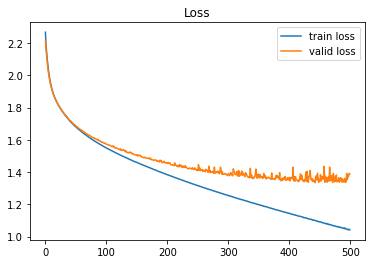

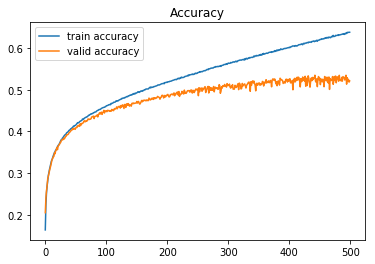

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()